In [9]:
# For nicer printing
options(digits=2);

In [2]:
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);

data <- survey[,-c(1:7)];
data <- data[ ,-which(names(data) %in% c("HomeWYN","HomeSYN","AwayWNY","AwaySNY","City","Utility",
           "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","SqftCate","Attitude","Trust","EnergyC","MCG",
                                         "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude","Longitude",
                                        "Job","hot","cold","Ethnic"))];
dataFull = data
data <- na.omit(data)
names(dataFull)

[1] "HomeW"      "HomeS"      "AwayW"      "AwayS"      "IncHomeS"  
 [6] "IncHomeW"   "RewardForm" "IncAwayS"   "IncAwayW"   "IncWD"     
[11] "IncDish"    "IncAutoS"   "IncAutoW"   "IncEmer10S" "IncEmer30S"
[16] "IncEmer10W" "IncEmer30W" "EmerRForm"  "EnergyC1"   "EnergyC2"  
[21] "EnergyC3"   "EnergyC4"   "MC1"        "MC2"        "MC3"       
[26] "MC4"        "MC5"        "Frugal1"    "Frugal2"    "Frugal3"   
[31] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "ComfNS1"   
[36] "ComfNS2"    "ComfNS3"    "ComfNW1"    "ComfNW2"    "ConvB1"    
[41] "ConvB2"     "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R"
[46] "ControlN3"  "ControlN4"  "Atti1"      "Atti2"      "Atti3"     
[51] "Atti4"      "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"      
[56] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "INT1"      
[61] "INT2"       "INT3"       "INT4"       "SN1"        "SN2"       
[66] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
[71] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
[76] "HabitE2"    "HabitE3"    "State"      "Age"        "Gender"    
[81] "OwnRent"    "BillS"      "BillW"      "Sqft"       "HouseholdS"
[86] "Political"  "Income"     "Educ"

In [4]:
#research question 1
r_q1 <- survey[,-c(1:7)];

r_q1 <- r_q1[r_q1$HomeSYN==1,];
r_q1 <- r_q1[,which(names(r_q1) %in% c("Age","Gender","OwnRent","BillS","Sqft","HouseholdS",
                                       "Political","Ethnic","Income","Educ","MC1","MC2","MC3",
                                       "MC4","MC5","Frugal1","Frugal2","Frugal3","Trust1",
                                       "Trust2","Trust3","Trust4","ComfNS1","ComfNS2","ComfNS3",
                                       "ConvB1","ConvB2","ConvB3","ConvB4","ControlN1","ControlN2R",
                                       "ControlN3","ControlN4","Atti1","Atti2","Atti3","Atti4",
                                       "SubNorm1","SubNorm2","SubNorm3","PBC1","PBC2","PBC3R",
                                       "PBC4","PBC5","SN1","SN2","SN3","SN4","HabitC1","HabitC2",
                                       "HabitC3","HabitC4","HabitC5","HabitC6","HabitC7","HabitE1",
                                       "HabitE2","HabitE3","IncHomeS"))];

res <- c();
vnam <- names(r_q1);
for (i in 2:dim(r_q1)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=r_q1))$r.squared,2)));
}

row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[which(names(r_q1) %in% c("IncHomeS")),]
#IncHomeS

ERROR: Error in -c("IncHomeS"): invalid argument to unary operator


In [11]:
#now explore variables
summary(data);

     HomeW        HomeS        AwayW        AwayS       IncHomeS     IncHomeW  
 Min.   :50   Min.   :40   Min.   :47   Min.   :40   Min.   : 1   Min.   :1.0  
 1st Qu.:68   1st Qu.:70   1st Qu.:64   1st Qu.:70   1st Qu.: 3   1st Qu.:3.0  
 Median :70   Median :72   Median :68   Median :75   Median : 4   Median :4.0  
 Mean   :70   Mean   :71   Mean   :67   Mean   :73   Mean   : 5   Mean   :4.4  
 3rd Qu.:72   3rd Qu.:75   3rd Qu.:70   3rd Qu.:78   3rd Qu.: 5   3rd Qu.:6.0  
 Max.   :80   Max.   :85   Max.   :80   Max.   :95   Max.   :99   Max.   :8.0  
   RewardForm     IncAwayS     IncAwayW      IncWD        IncDish   
 Min.   :1.0   Min.   : 1   Min.   : 1   Min.   :1.0   Min.   :1.0  
 1st Qu.:4.0   1st Qu.: 4   1st Qu.: 4   1st Qu.:4.0   1st Qu.:3.0  
 Median :5.0   Median : 5   Median : 5   Median :5.0   Median :4.0  
 Mean   :4.5   Mean   : 5   Mean   : 5   Mean   :4.7   Mean   :4.1  
 3rd Qu.:5.0   3rd Qu.: 7   3rd Qu.: 7   3rd Qu.:6.0   3rd Qu.:6.0  
 Max.   :8.0   Max.   :99 

In [12]:
#Fields with lots of missing values
for (n in names(dataFull)){
    nmis = sum(is.na(dataFull[,n]))
    if(nmis >10)  print (c(n, sum(is.na(dataFull[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncWD" "98"   
[1] "IncDish" "271"    


In [13]:
#lets remove these
data1 <- dataFull[ ,-which(names(dataFull) %in% c("HomeW","HomeS","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data1))
data1 <- na.omit(data1)
print(dim(data1))

[1] 826  82
[1] 813  82


In [14]:
#what about other suspicious value: constant
sel <- !is.na(apply(data1,1,max));
print(sum(sel));print(length(sel))
selC = apply(data1[sel,],2,var)>0
#Looks good
sum(selC)


[1] 813
[1] 813


[1] 82

In [15]:
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
hiCor(data1,.8)

,IncAutoS,IncAutoW,IncEmer10S,IncEmer30S,IncEmer10W,IncEmer30W,EnergyC1,EnergyC2,EnergyC3,EnergyC4,...,ComfNW1,ComfNW2,Atti1,Atti2,Atti3,Atti4,PBC2,PBC4,SN1,SN2
IncAutoS,1.000,0.802,0.447,0.482,0.4133,0.461,-0.159,-0.151,-0.138,-0.24,...,0.042,0.033,-0.133,-0.132,-0.119,-0.110,-0.039,-0.059,-0.0344,-0.035
IncAutoW,0.802,1.000,0.406,0.445,0.4696,0.507,-0.137,-0.125,-0.125,-0.23,...,0.109,0.128,-0.093,-0.097,-0.108,-0.092,-0.022,-0.048,-0.0248,-0.043
IncEmer10S,0.447,0.406,1.000,0.811,0.7893,0.652,-0.085,-0.099,-0.098,-0.16,...,0.038,0.064,-0.098,-0.116,-0.105,-0.096,-0.066,-0.075,-0.0248,-0.046
IncEmer30S,0.482,0.445,0.811,1.000,0.6469,0.760,-0.113,-0.132,-0.128,-0.18,...,0.037,0.043,-0.126,-0.131,-0.127,-0.105,-0.036,-0.047,-0.0189,-0.039
IncEmer10W,0.413,0.470,0.789,0.647,1.0000,0.807,-0.096,-0.121,-0.127,-0.17,...,0.101,0.125,-0.097,-0.120,-0.094,-0.083,-0.067,-0.083,-0.0086,-0.037
IncEmer30W,0.461,0.507,0.652,0.760,0.8067,1.000,-0.117,-0.145,-0.131,-0.20,...,0.122,0.134,-0.129,-0.130,-0.111,-0.114,-0.032,-0.052,-0.0205,-0.032
EnergyC1,-0.159,-0.137,-0.085,-0.113,-0.0956,-0.117,1.000,0.710,0.607,0.81,...,-0.142,-0.163,0.484,0.501,0.472,0.479,0.164,0.157,0.1331,0.114
EnergyC2,-0.151,-0.125,-0.099,-0.132,-0.1214,-0.145,0.710,1.000,0.811,0.69,...,-0.074,-0.090,0.453,0.492,0.427,0.448,0.187,0.180,0.1229,0.102
EnergyC3,-0.138,-0.125,-0.098,-0.128,-0.1271,-0.131,0.607,0.811,1.000,0.60,...,-0.033,-0.053,0.421,0.471,0.424,0.423,0.168,0.160,0.1456,0.142
EnergyC4,-0.238,-0.232,-0.165,-0.177,-0.1650,-0.196,0.809,0.687,0.597,1.00,...,-0.129,-0.162,0.487,0.527,0.486,0.510,0.239,0.217,0.1458,0.131


In [16]:
res<-prcomp(data1[sel,selC], retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data1[sel,selC], retx=F,scale=T)$sdev^2)/
     sum(prcomp(data1[sel,selC], retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    Atti1 Atti2 Atti3 Atti4 INT1 INT2
PC1  0.23  0.22  0.21  0.22 0.22 0.21
[1] 0.19
    IncHomeS IncAwayS IncEmer10S IncEmer30S ComfNS1 ComfNS2 ComfNS3 HabitC6
PC2    -0.33    -0.34      -0.33      -0.33    0.29    0.25    0.25   -0.22
[1] 0.24
    Trust1 Trust3 Trust4 ConvB2 INT4   SN1   SN2   SN3   SN4
PC3  -0.25  -0.26  -0.24   -0.2 -0.2 -0.25 -0.26 -0.26 -0.24
[1] 0.28
   
PC4
[1] 0.32
    IncHomeW IncAwayW IncEmer10W IncEmer30W
PC5     0.42      0.4       0.43       0.42
[1] 0.36
    OwnRent BillS BillW  Sqft Income
PC6   -0.25 -0.25 -0.28 -0.23  -0.21
[1] 0.39
    ComfNW1 ComfNW2 HabitC5 Income
PC7    0.34    0.31   -0.22  -0.21
[1] 0.42
    Trust2 ConvB3 ConvB4   SN1   SN2  SN3  SN4 HabitC3
PC8   0.24   0.22   0.24 -0.22 -0.21 -0.2 -0.2   -0.21
[1] 0.45
     MC1  MC2 ConvB2 ConvB3 ConvB4 Educ
PC9 0.24 0.26   0.21   0.21   0.21 0.21
[1] 0.48
     ComfNS2 ComfNS3 ComfNW1 ComfNW2  SN2  SN4 HabitC5 BillW HouseholdS
PC10    0.23    0.24   -0.29   -0.28 0.22 0.24    0.23  -0

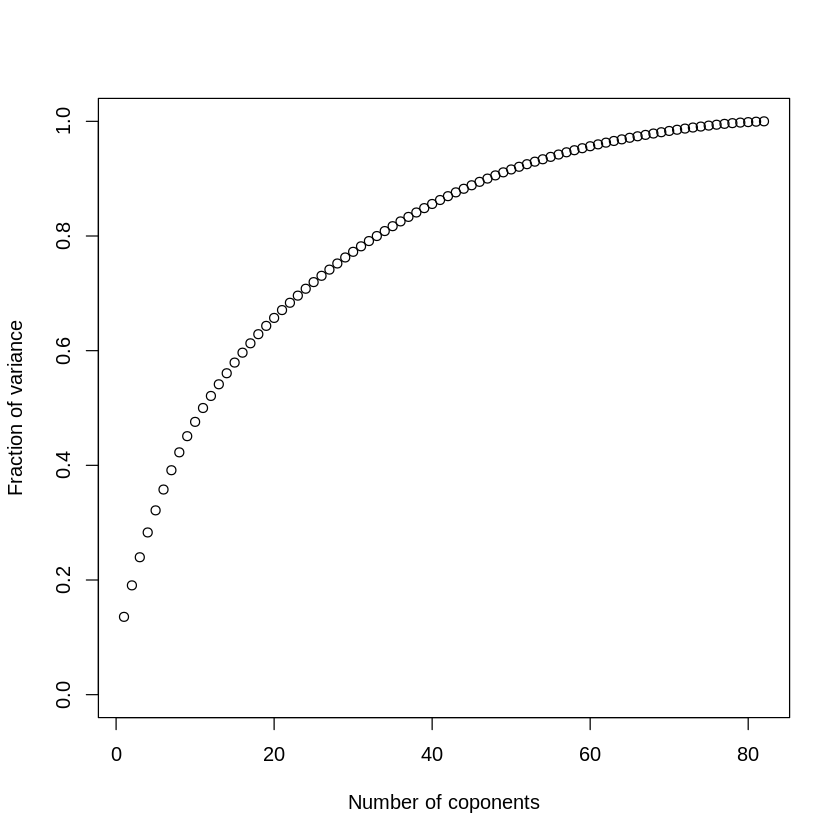

In [17]:
plot(1:dim(data1)[2],cumsum(prcomp(data1, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data1, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [50]:
res <- c();
vnam <- names(data1);
for (i in 2:dim(data1)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data1))$r.squared,2)));
}

In [51]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

IncAutoW,7,0.69
BillS,76,0.68
MC2,18,0.67
MC1,17,0.66
IncAwayS,4,0.65
Trust2,26,0.65
SN4,61,0.65
ComfNS2,30,0.64
BillW,77,0.62
Frugal2,23,0.61
ConvB4,37,0.59


In [20]:
#library(reshape2)
#library(ggplot2)
#d <- melt(data,-c(1:4))
#boxplot(data[,c(1:4)])
#ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [21]:
#d <- melt(data,-c(5:9))
#boxplot(data[,c(5:9)])
#ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [22]:
#d <- melt(data,-c(10:13))
#boxplot(data[,c(10:13)])
#ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [23]:
#d <- melt(data,-c(14:18))
#boxplot(data[,c(14:18)])
#ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [24]:
#da <- melt(data,-c(19:22))
#boxplot(data[,c(19:22)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [25]:
#da <- melt(data,-c(23:27))
#boxplot(data[,c(23:27)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [26]:
#da <- melt(data,-c(28:30))
#boxplot(data[,c(28:30)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [27]:
#da <- melt(data,-c(31:34))
#boxplot(data[,c(31:34)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [28]:
#da <- melt(data,-c(35:39))
#boxplot(data[,c(35:39)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [29]:
#da <- melt(data,-c(40:43))
#boxplot(data[,c(40:43)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [30]:
#da <- melt(data,-c(44:47))
#boxplot(data[,c(44:47)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [31]:
#da <- melt(data,-c(48:51))
#boxplot(data[,c(48:51)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [32]:
#da <- melt(data,-c(52:54))
#boxplot(data[,c(52:54)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [33]:
#da <- melt(data,-c(55:59))
#boxplot(data[,c(55:59)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [34]:
#da <- melt(data,-c(60:63))
#boxplot(data[,c(60:63)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [35]:
#da <- melt(data,-c(64:67))
#boxplot(data[,c(64:67)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [36]:
#da <- melt(data,-c(68:74))
#boxplot(data[,c(68:74)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [37]:
#da <- melt(data,-c(75:77))
#boxplot(data[,c(75:77)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [38]:
#da <- melt(data,-c(78:90))
#tmp1 <- data[ ,which(names(data) %in% c("State","Age"))];
#boxplot(tmp1)
#tmp2 <- data[ ,which(names(data) %in% c("BillS","BillW"))];
#boxplot(tmp2)
#tmp3 <- data[ ,which(names(data) %in% c("Sqft"))];
#boxplot(tmp3)
#tmp4 <- data[ ,which(names(data) %in% c("HouseholdS","Political","Income","Educ","Job"))]
#boxplot(tmp4)
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [39]:
#da <- melt(data,-c(91:92))
#boxplot(data[,c(91:92)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

In [40]:
#da <- melt(data,-c(93:100))
#boxplot(data[,c(93:100)])
#ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

### Interpret  basic summaries

Interpret correlations

Now, just show top correlations

In [41]:
sel <- !is.na(apply(data,1,max));
print(sum(sel));print(length(sel))
selC = apply(data[sel,],2,var)>0

[1] 371
[1] 371


In [42]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
hiCor(data[sel,selC],.85)

,Trust1,Trust4,PBC2,PBC4,SN1,SN2
Trust1,1.000,0.886,0.0500,0.088,0.203,0.2063
Trust4,0.886,1.000,0.0607,0.114,0.204,0.1789
PBC2,0.050,0.061,1.0000,0.867,0.013,0.0029
PBC4,0.088,0.114,0.8672,1.000,0.043,0.0125
SN1,0.203,0.204,0.0127,0.043,1.000,0.8650
SN2,0.206,0.179,0.0029,0.012,0.865,1.0000


## How to select an orthogonal subset of predictors?

Lets take a look at principal components

In [43]:

sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)

[1] 88

[1] 0.13
    Atti1 Atti2 Atti3 Atti4 INT1 INT2
PC1  0.23  0.22  0.21  0.22 0.22 0.21
[1] 0.18
    IncAutoS IncAutoW IncEmer10W IncEmer30W Trust1 Trust3
PC2    -0.24    -0.26       -0.2      -0.21   0.21   0.21
[1] 0.23
    IncWD IncDish IncAutoS IncAutoW IncEmer30W ComfNS1  SN1  SN2  SN4
PC3  0.22    0.22      0.2      0.2        0.2    0.21 0.23 0.22 0.22
[1] 0.27
    IncHomeS IncAwayS IncEmer10S IncEmer30S
PC4     0.37      0.4       0.44       0.43
[1] 0.32
    HomeW AwayW ComfNW1
PC5   0.2  0.21    0.23
[1] 0.35
    ComfNW1 ComfNW2  PBC2 PBC4   SN1
PC6   -0.25   -0.21 -0.22 -0.2 -0.21
[1] 0.38
    HomeW AwayW Trust2 Trust4 SubNorm2 PBC3R HabitC5
PC7  0.28   0.3   0.21    0.2    -0.21  0.22   -0.23
[1] 0.41
      MC1   MC2 ComfNS1 ComfNS2 ComfNS3
PC8 -0.25 -0.26    0.26    0.28    0.31
[1] 0.44
    Trust4 HabitE3 BillS BillW HouseholdS
PC9   0.21    0.21 -0.32 -0.27      -0.21
[1] 0.47
     HomeS AwayS ConvB2 ConvB4 ControlN1 ControlN4 PBC4
PC10 -0.33 -0.27   0.23   0.22      0.28  

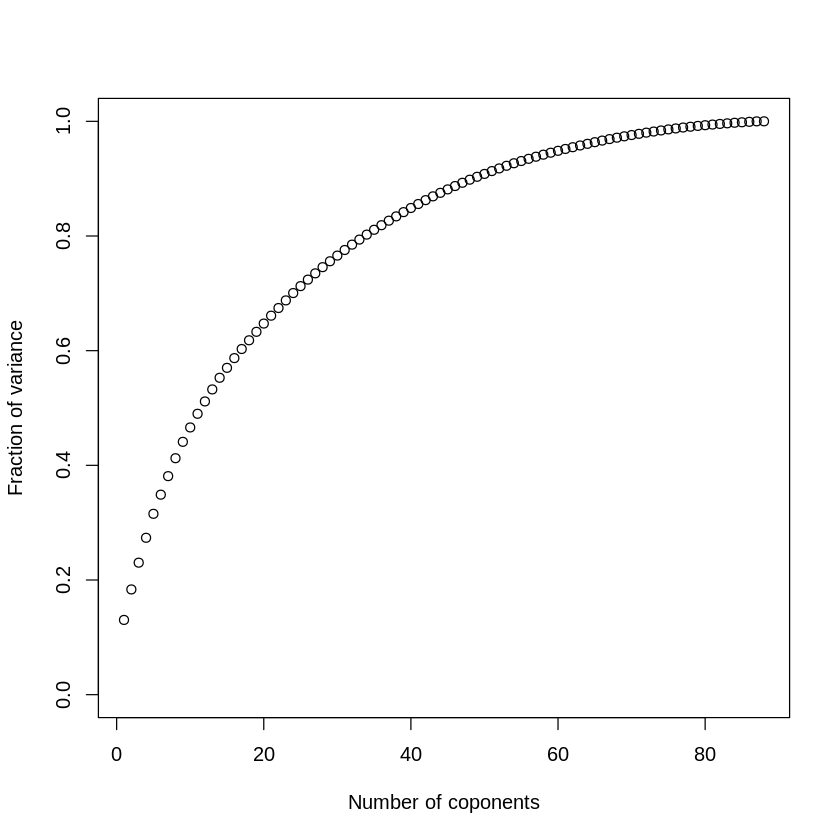

In [44]:
plot(1:sum(selC),cumsum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)/
     sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");
res<-prcomp(data[sel,selC], retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)/
     sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


In [45]:
#mydata <-scale(data);
mydata <- data;
mydata

,HomeW,HomeS,AwayW,AwayS,IncHomeS,IncHomeW,RewardForm,IncAwayS,IncAwayW,IncWD,...,Age,Gender,OwnRent,BillS,BillW,Sqft,HouseholdS,Political,Income,Educ
3,70,72,63,68,8,8,4,8,8,4,...,39,2,2,55,60,2100,3,1,7,2
4,69,68,67,72,4,4,5,4,4,7,...,35,1,1,110,150,1292,2,3,6,5
6,74,69,70,70,2,2,5,3,3,4,...,24,2,1,150,190,1250,5,7,6,3
8,72,70,72,70,8,6,5,6,6,7,...,42,2,2,200,100,2000,4,6,8,4
11,65,65,65,65,7,6,4,5,5,4,...,25,1,2,120,140,500,3,6,3,2
12,68,77,65,80,4,4,5,4,4,4,...,58,2,2,350,250,2200,2,1,9,6
15,75,70,75,75,6,6,5,6,6,6,...,51,2,1,180,170,919,4,2,5,3
16,73,73,73,73,6,6,5,7,6,4,...,31,1,2,200,50,1400,3,6,8,4
17,70,73,64,80,2,2,5,1,1,5,...,35,1,2,125,65,1450,2,1,9,4
18,69,75,67,77,6,7,3,7,7,6,...,53,2,2,180,190,1500,3,5,4,2


Group.1,HomeW,HomeS,AwayW,AwayS,IncHomeS,IncHomeW,RewardForm,IncAwayS,IncAwayW,...,Age,Gender,OwnRent,BillS,BillW,Sqft,HouseholdS,Political,Income,Educ
1,69,72,66,74,5.6,4.5,4.6,5.5,4.9,...,40,1.6,1.8,202,187,2362,3.4,4.6,6.6,3.7
2,70,71,67,73,4.6,4.3,4.5,5.3,5.3,...,35,1.6,1.6,155,138,1198,2.8,4.2,5.4,3.6
3,72,71,70,73,3.4,3.7,4.6,5.0,4.4,...,38,1.6,1.9,197,260,5957,3.4,3.4,6.2,3.2


3   4   6   8  11  12  15  16  17  18  19  20  22  23  29  34  36  37  41  42 
  1   2   2   1   2   1   2   2   2   2   1   1   2   1   1   2   2   1   2   1 
 49  51  54  56  57  58  59  61  63  65  66  67  68  70  72  73  75  76  78  79 
  2   1   2   2   1   2   1   2   2   2   1   2   2   1   2   2   2   1   2   1 
 82  84  86  87  89  92  93  94  96  97 100 101 106 110 112 116 117 119 122 126 
  2   1   2   2   1   1   2   1   2   1   2   3   2   2   1   2   1   2   2   1 
127 131 132 134 137 139 140 141 142 143 144 148 151 154 155 157 163 164 166 169 
  2   3   2   1   1   2   2   1   2   1   2   2   2   1   2   2   2   1   1   2 
170 172 176 177 179 181 182 183 184 186 187 189 190 192 194 196 200 201 203 205 
  1   2   1   2   2   1   2   1   2   2   2   2   2   2   2   2   2   2   1   2 
207 208 210 213 216 217 218 221 224 227 231 236 237 238 240 241 243 248 249 250 
  1   2   2   2   2   2   2   1   2   1   2   2   2   2   2   2   1   1   2   1 
251 256 259 261 262 263 266 267 269 274 275 277 282 285 287 289 294 300 304 307 
  2   2   2   1   1   2   1   1   2   2   2   2   1   2   2   2   2   2   1   1 
308 310 311 317 318 321 326 328 329 331 332 333 336 339 340 342 344 348 350 353 
  2   1   3   1   2   2   1   2   2   1   1   2   2   1   2   1   2   2   2   1 
356 360 362 364 368 370 374 377 380 381 385 386 387 388 392 395 398 399 400 402 
  1   2   2   1   2   1   2   1   2   1   2   2   2   2   1   2   1   2   2   1 
403 405 408 409 410 411 412 415 419 423 424 425 428 429 430 431 434 435 436 438 
  1   2   2   1   2   1   2   2   2   1   1   1   2   2   2   2   2   2   2   2 
441 443 447 450 453 458 460 461 469 470 473 474 475 480 481 482 483 489 491 493 
  1   2   2   1   2   1   2   2   2   2   1   2   2   2   1   1   3   2   2   2 
494 498 499 500 503 504 506 508 509 510 513 514 516 517 525 526 531 533 535 537 
  1   2   1   1   2   1   1   1   2   1   2   1   2   1   1   2   2   2   2   2 
539 545 547 548 554 555 557 558 562 563 565 566 568 569 570 571 572 578 579 583 
  2   2   1   2   2   2   1   2   2   2   1   2   1   2   2   3   1   2   1   1 
585 587 588 589 595 600 602 603 604 608 612 618 621 622 623 624 626 627 630 631 
  2   1   1   1   2   2   2   1   2   1   1   2   1   2   2   2   2   1   2   3 
633 635 639 642 643 645 646 648 650 651 652 655 659 666 668 670 672 673 682 684 
  2   1   1   2   1   2   1   2   1   2   2   1   2   1   2   1   2   1   1   2 
686 688 690 694 695 698 703 706 707 713 714 716 717 719 723 724 725 728 731 732 
  2   3   1   2   2   2   1   1   3   1   2   1   1   1   1   1   2   1   1   1 
733 734 736 738 739 740 743 744 746 747 749 754 755 757 761 763 764 765 768 772 
  1   2   1   2   2   2   3   2   1   2   2   1   1   1   2   2   2   1   2   1 
774 778 782 783 786 787 788 793 794 796 797 799 800 801 802 804 806 807 808 810 
  2   1   2   1   2   1   2   2   1   2   1   2   1   2   1   2   2   1   2   1 
811 813 814 815 816 817 820 821 824 825 826 
  2   1   2   2   2   1   1   2   2   2   2

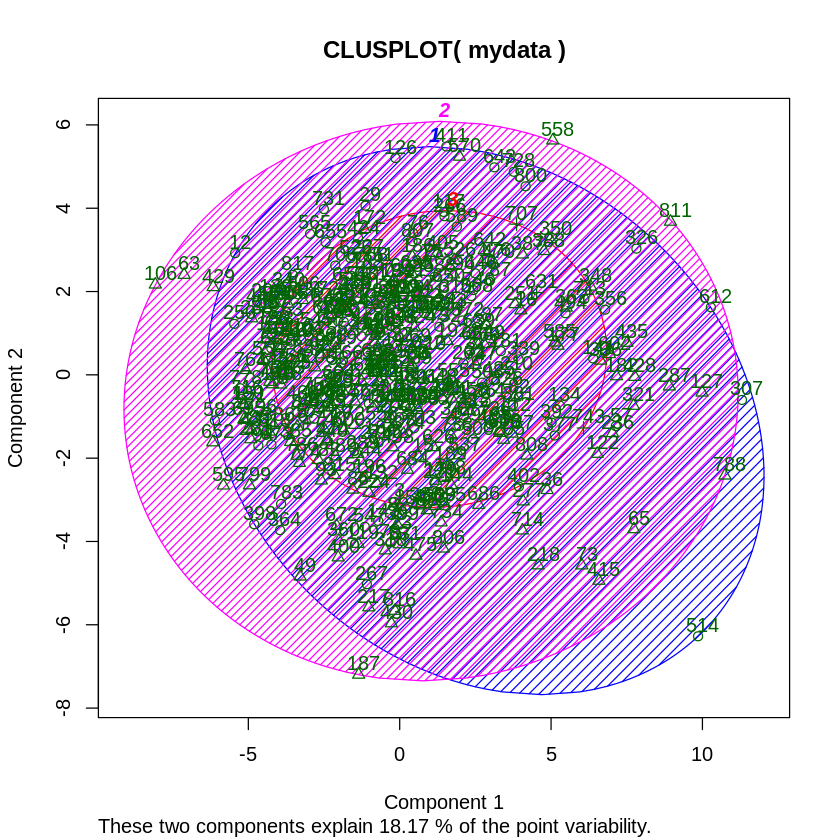

In [46]:
#mydata <- scale(data);
#mydata <- data
# Determine number of clusters
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(mydata, 
  	centers=i)$withinss)
#plot(1:15, wss, type="b", xlab="Number of Clusters",
#  ylab="Within groups sum of squares")
# K-Means Cluster Analysis
fit <- kmeans(mydata, 3) 
# get cluster means 
aggregate(mydata,by=list(fit$cluster),FUN=mean)
# append cluster assignment
mydata <- data.frame(mydata, fit$cluster)
fit$cluster;
# Cluster Plot against 1st 2 principal components
# vary parameters for most readable graph
library(cluster) 
clusplot(mydata, fit$cluster, color=TRUE, shade=TRUE, 
  	labels=2, lines=0)

### * Regress each predictor on the remaining predictors
eliminate with the highest adjR^2

In [47]:
c();
names(data);
dim(data)[2]

NULL

[1] "HomeW"      "HomeS"      "AwayW"      "AwayS"      "IncHomeS"  
 [6] "IncHomeW"   "RewardForm" "IncAwayS"   "IncAwayW"   "IncWD"     
[11] "IncDish"    "IncAutoS"   "IncAutoW"   "IncEmer10S" "IncEmer30S"
[16] "IncEmer10W" "IncEmer30W" "EmerRForm"  "EnergyC1"   "EnergyC2"  
[21] "EnergyC3"   "EnergyC4"   "MC1"        "MC2"        "MC3"       
[26] "MC4"        "MC5"        "Frugal1"    "Frugal2"    "Frugal3"   
[31] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "ComfNS1"   
[36] "ComfNS2"    "ComfNS3"    "ComfNW1"    "ComfNW2"    "ConvB1"    
[41] "ConvB2"     "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R"
[46] "ControlN3"  "ControlN4"  "Atti1"      "Atti2"      "Atti3"     
[51] "Atti4"      "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"      
[56] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "INT1"      
[61] "INT2"       "INT3"       "INT4"       "SN1"        "SN2"       
[66] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
[71] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
[76] "HabitE2"    "HabitE3"    "State"      "Age"        "Gender"    
[81] "OwnRent"    "BillS"      "BillW"      "Sqft"       "HouseholdS"
[86] "Political"  "Income"     "Educ"

[1] 88

In [48]:
#res <- c();
vnam <- names(data);
for (i in 2:dim(data)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

ERROR: Error in vnam[res[, 1]]: only 0's may be mixed with negative subscripts


### Finally select the model
  Note, that exploring only the predictor space is not leading to
     multiple comparisons issue!

  * replace lSEXP by lEXP: simpler 
  * why lLOC, lLA, lLD, lND, lNlgn: keep lND as most stable, keep lLOC?

In [ ]:
fmla ~ isBad ~ lNS+lLA+FIX+lLOC+lINT+lEXP

* We'll need to do prediction, so drop last few years

In [ ]:
data1 <- data;
data1$from <- risk$from/3600/24/365.25+1970;
dataFit <- data1[data1$from<=1997,]; #80%
dataTest <- data1[data1$from>1997,]; #20%

In [ ]:
mod <- glm(isBad ~ lNS+lLA+FIX+lLOC+lINT+lEXP,family=binomial,data=dataFit);
summary(mod); 

Note AIC: 2753

threfore lINT probably not important

### Good to order by variance explained (Anova Deviance/Df)

In [ ]:
anova(mod, test="Chi");

A similar picture, lINT does not explain as much as others

In [ ]:
mod <- glm(isBad ~ lNS+lND+FIX+lEXP+lINT,family=binomial,data=dataFit);
summary(mod);

### Slightly higher AIC: 2762, but a simpler model
   * don't chase the best fit, as it leads to overfitting

In [ ]:
anova(mod, test="Chi");#it is good to order predictors by deviance explained

* Note: use test="F" for linear models (lm)
* Note: R's anova order matters in variance explained, as
  each SS is based on the residuals from predictors going before it
* Alternative sum of squares for ANOVA are obtained via drop1
*  In this case it is based on the residuals of remaining predictors (not
  just of preceeding predictors

In [ ]:
drop1(mod, test="Chi");

### Variance inflation factor
 http://en.wikipedia.org/wiki/Variance_inflation_factor

In [ ]:
library(car)
vif(mod);

￼
* Is less than 5 (max is 3.1 for lND), but lower would be better

### Exercise: other diagnostics
* is model stable if some data is dropped?
* what if we change data as in GDF?
* is there a time trend 
    isBad ~ lNS+lND+FIX+lEXP+lINT+from
* independece (residuals)

Now interpret the model
* What do estimated coefficients mean?
* Increase NS from 1 to 2, but other predictors matter
* threfore pick values that are reasonable or a median

In [ ]:
try <- dataFit[1:2,];
for (i in dim(dataFit)[2])
  try[,i] <- median(dataFit[,i]);
try[1,"lNS"] <- 0;
try[2,"lNS"] <- log(2);
res <- 1/(1+exp(-predict(mod,try)));
res[2]*(1-res[1])/res[1]/(1-res[2]);

### The answer is how much the risk increases if number of subsystems touched is increased from 1 to 2
  * First ratio of risk then 
  * ratio of odds

# Do prediction

In [ ]:
predicted <- 1/(1+exp(-predict(mod,dataTest)));
tapply(predicted, dataTest$isBad, mean)

## Good to know
* predicted probability is almost three times higher for the MRs that break patches

### Traditional performance:

In [ ]:
for (cutof in c(.01, .015, .02, .03, .04, .045,.1)){
  res <- table(predicted>cutof, dataTest$isBad);
  type1 <- res[2,1]/(res[1,1]+res[2,1]);
  type2 <- res[1,2]/(res[1,2]+res[2,2]);
  recall <- 1 - type2;
  precision <- res[2,2]/(res[2,1]+res[2,2]);
  print (c(cutof,type1,type2,recall,precision));
}

### A single number such as ROC typically makes little sense:
* in this case the primary concern is decent recall

### Exercise:
* compare to a random predictor
* compare to a simple predictor, e.g, more than one subsystem

### Try other prediction methods

In [ ]:
library(rpart);

fmla <- isBad ~ lNS+lND+FIX+lINT+lEXP+lLA;
er <- c();
for (w in c(20,40,60,80, 100, 110)){ 
  cart.fit <- rpart(fmla,data=dataFit,method="class",weights=as.numeric(dataFit$isBad)*w+1);
  cart.pred <- predict(cart.fit,newdata=dataTest,type="class");
  res <- table(cart.pred, dataTest$isBad);
  type1 <- res[2,1]/(res[1,1]+res[2,1]);
  type2 <- res[1,2]/(res[1,2]+res[2,2]);
  recall <- 1 - type2;
  precision <- res[2,2]/(res[2,1]+res[2,2]);
  er <- rbind (er, c(w,type1,type2,recall,precision));
}

In [ ]:
### Slightly worse than the regression model